In [1]:
import pandas as pd

# Load the dimension tables
customer_dim = pd.read_csv('Customer_Dim.csv')
date_dim = pd.read_csv('Date_Dim.csv')
product_dim = pd.read_csv('Product_Dim.csv')
location_dim = pd.read_csv('Location_Dim.csv')

# Load the fact table
churn_fact = pd.read_csv('Churn_Fact.csv')

In [2]:
# Display the first few rows of each table
print("Customer Dimension:")
print(customer_dim.head())

print("\nDate Dimension:")
print(date_dim.head())

print("\nProduct Dimension:")
print(product_dim.head())

print("\nLocation Dimension:")
print(location_dim.head())

print("\nChurn Fact Table:")
print(churn_fact.head())

Customer Dimension:
   Customer_ID               Name  Age  Gender          Location
0            1      Katie Allison   34  Female  New Timothyburgh
1            2  Danielle Mccarthy   52    Male          Jacobton
2            3     Richard Murray   55    Male   East Samueltown
3            4      Larry Jackson   25    Male     Ashleychester
4            5         Logan Long   66  Female      Lake Jeffrey

Date Dimension:
         Date  Year  Month  Day  Weekday
0  2022-01-01  2022      1    1        5
1  2022-01-02  2022      1    2        6
2  2022-01-03  2022      1    3        0
3  2022-01-04  2022      1    4        1
4  2022-01-05  2022      1    5        2

Product Dimension:
   Product_ID Product_Name Product_Type       Price
0           1    Product_1       Type_A  283.742999
1           2    Product_2       Type_B  295.830866
2           3    Product_3       Type_C   87.356391
3           4    Product_4       Type_C  155.333138
4           5    Product_5       Type_A  412.25

In [3]:
# Join churn fact with customer dimension
churn_data = pd.merge(churn_fact, customer_dim, on='Customer_ID')

In [4]:
# Merge with date dimension
churn_data = pd.merge(churn_data, date_dim, left_on='Date', right_on='Date')

# Merge with product dimension
churn_data = pd.merge(churn_data, product_dim, on='Product_ID')

# Merge with location dimension (assuming location is part of customer data)
churn_data = pd.merge(churn_data, location_dim, left_on='Location', right_on='City')

# Display the first few rows of the final merged dataset
print(churn_data.head())

   Customer_ID        Date  Product_ID  Churn_Status           Name  Age  \
0        20793  2022-12-22           8             1  Amy Davenport   47   
1        20793  2022-12-22           8             1  Amy Davenport   47   
2        20793  2022-12-22           8             1  Amy Davenport   47   
3        20793  2022-10-18           7             0  Amy Davenport   47   
4        20793  2022-10-18           7             0  Amy Davenport   47   

   Gender    Location  Year  Month  Day  Weekday Product_Name Product_Type  \
0  Female  Jamiemouth  2022     12   22        3    Product_8       Type_B   
1  Female  Jamiemouth  2022     12   22        3    Product_8       Type_B   
2  Female  Jamiemouth  2022     12   22        3    Product_8       Type_B   
3  Female  Jamiemouth  2022     10   18        1    Product_7       Type_A   
4  Female  Jamiemouth  2022     10   18        1    Product_7       Type_A   

        Price  Location_ID        City State    Country  
0  428.998697   

In [5]:
# Calculate overall churn rate
churn_rate = churn_data['Churn_Status'].mean()
print(f"Overall Churn Rate: {churn_rate:.2%}")

Overall Churn Rate: 30.00%


In [6]:
# Calculate churn rate by product
churn_by_product = churn_data.groupby('Product_Name')['Churn_Status'].mean().reset_index()
print(churn_by_product)

  Product_Name  Churn_Status
0    Product_1      0.296245
1   Product_10      0.311760
2    Product_2      0.295711
3    Product_3      0.299369
4    Product_4      0.290920
5    Product_5      0.315679
6    Product_6      0.288262
7    Product_7      0.293134
8    Product_8      0.294741
9    Product_9      0.313329


In [7]:
# Create age groups
churn_data['Age_Group'] = pd.cut(churn_data['Age'], bins=[18, 30, 40, 50, 60, 70], labels=['18-30', '31-40', '41-50', '51-60', '61-70'])

# Calculate churn rate by age group
churn_by_age_group = churn_data.groupby('Age_Group')['Churn_Status'].mean().reset_index()
print(churn_by_age_group)

  Age_Group  Churn_Status
0     18-30      0.298747
1     31-40      0.303455
2     41-50      0.300391
3     51-60      0.294427
4     61-70      0.305159


In [8]:
# Calculate churn rate by city
churn_by_location = churn_data.groupby('City')['Churn_Status'].mean().reset_index()
print(churn_by_location)

               City  Churn_Status
0         Aaronberg           0.2
1         Aaronbury           0.0
2      Aaronchester           1.0
3         Aaronfurt           1.0
4         Aaronland           0.0
...             ...           ...
9733  Zimmermantown           0.0
9734  Zimmermanview           0.0
9735       Zoeburgh           0.0
9736     Zunigafurt           0.0
9737    Zunigaville           0.0

[9738 rows x 2 columns]


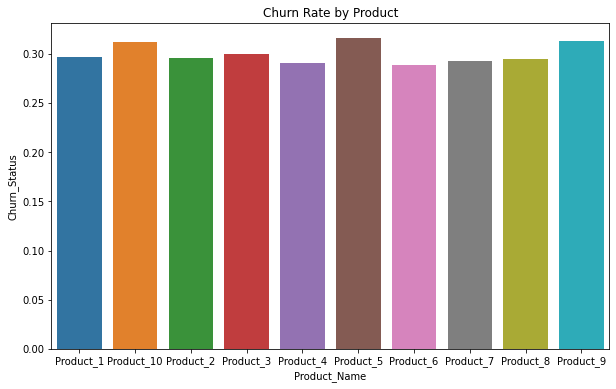

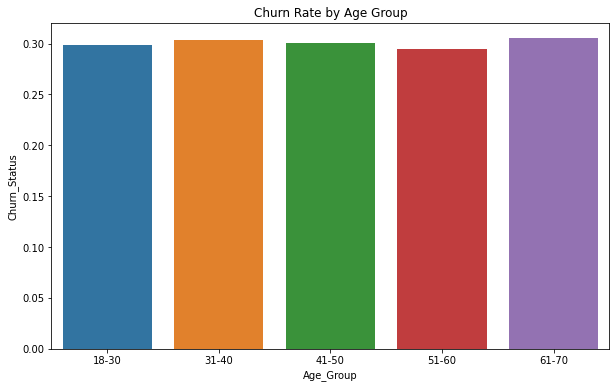

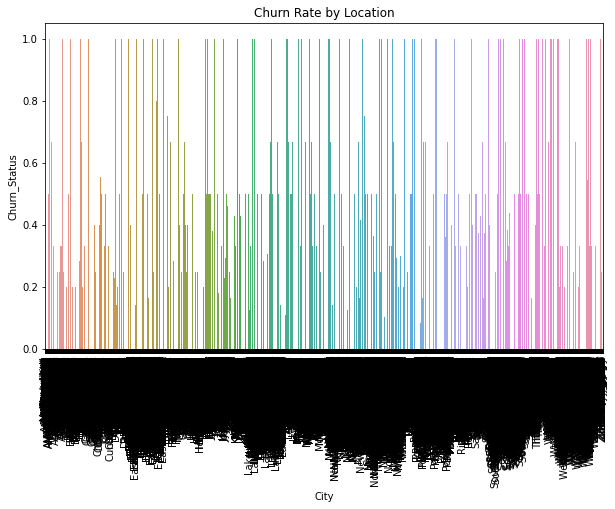

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize churn rate by product
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_Name', y='Churn_Status', data=churn_by_product)
plt.title('Churn Rate by Product')
plt.show()

# Visualize churn rate by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Churn_Status', data=churn_by_age_group)
plt.title('Churn Rate by Age Group')
plt.show()

# Visualize churn rate by location
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Churn_Status', data=churn_by_location)
plt.title('Churn Rate by Location')
plt.xticks(rotation=90)
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Prepare the data for modeling
X = churn_data[['Age', 'Price', 'Month', 'Product_ID']]  # Example features
y = churn_data['Churn_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.70      1.00      0.83     42408
           1       0.00      0.00      0.00     17923

    accuracy                           0.70     60331
   macro avg       0.35      0.50      0.41     60331
weighted avg       0.49      0.70      0.58     60331



C:\Users\49176\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\49176\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\49176\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
